In [ ]:
# import relevant libraries

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
# import statsmodels.api as sm
# from sklearn import *
import datetime
from dateutil.relativedelta import relativedelta
from statsmodels.tsa.seasonal import seasonal_decompose

%matplotlib inline

In [ ]:
data = data.T
data

0                     1                 2    \
分類名     ダイアラスター　包材Ｈダイアラスター　Ｈ  ダイアラスター　包材Ｈダイアラスター　Ｈ  ダイアラスター　包材Ｈその他　Ｈ   
60期末                     NaN               90060.0               NaN   
61期4月                 7140.0               41320.0               0.0   
61期5月                29680.0               34680.0               0.0   
61期6月                12240.0               22440.0               0.0   
...                      ...                   ...               ...   
68期11月                  6120                 30600                 0   
68期12月                     0                 30600                 0   
68期1月                    NaN                   NaN               NaN   
68期2月                    NaN                   NaN               NaN   
68期3月                    NaN                   NaN               NaN   

                     3                       4                       5    \
分類名     ダイアラスター　包材Ｈその他　Ｈ  ダイアラスター　包材ＨＥダイアラスター　ＨＥ  ダイアラスター　包材ＨＥダイアラスター　ＨＥ   
60期末                 0.0                     NaN               4615306.0   
61期4月                0.0               2158960.0               4133026.0   
61期5月                0.0               1872640.0               3768786.0   
61期6月                0.0               2055960.0               4008826.0   
...                  ...                     ...                     ...   
68期11月                 0                 3822440                 5799469   
68期12月                 0                 2598400                 5913149   
68期1月                NaN                     NaN                     NaN   
68期2月                NaN                     NaN                     NaN   
68期3月                NaN                     NaN                     NaN   

                       6                   7                         8    \
分類名     ダイアラスター　包材ＨＥその他　ＨＥ  ダイアラスター　包材ＨＥその他　ＨＥ  ダイアラスター　包材Ｈ２７ダイアラスター　Ｈ２７   
60期末                   NaN                 0.0                       NaN   
61期4月               7930.0                 0.0                  120480.0   
61期5月               3880.0                 0.0                   43240.0   
61期6月                  0.0                 0.0                   42000.0   
...                    ...                 ...                       ...   
68期11月                   0                   0                     42160   
68期12月                   0                   0                     75320   
68期1月                  NaN                 NaN                       NaN   
68期2月                  NaN                 NaN                       NaN   
68期3月                  NaN                 NaN                       NaN   

                             9    ...                                  218  \
分類名     ダイアラスター　包材Ｈ２７ダイアラスター　Ｈ２７  ...  ファインバリヤーファインバリヤー　フイルムファインバリヤー断裁規格有フ   
60期末                    483280.0  ...                                  NaN   
61期4月                   470720.0  ...                                  0.0   
61期5月                   427000.0  ...                                  0.0   
61期6月                   383800.0  ...                                  0.0   
...                          ...  ...                                  ...   
68期11月                    297880  ...                                    0   
68期12月                    288680  ...                                    0   
68期1月                        NaN  ...                                  NaN   
68期2月                        NaN  ...                                  NaN   
68期3月                        NaN  ...                                  NaN   

                                        219  \
分類名     ファインバリヤーファインバリヤー　フイルムファインバリヤー断裁規格有フ   
60期末                                    0.0   
61期4月                                   0.0   
61期5月                                   0.0   
61期6月                                   0.0   
...                                     ...   
68期11月                                    0   
68期12月               

In [ ]:
data = data.drop(['大分類', '中分類', '小分類','細分類','区分',	'区分名'], axis=1)
data

分類名     60期末      61期4月      61期5月  \
0                   ダイアラスター　包材Ｈダイアラスター　Ｈ      NaN     7140.0    29680.0   
1                   ダイアラスター　包材Ｈダイアラスター　Ｈ  90060.0    41320.0    34680.0   
2                       ダイアラスター　包材Ｈその他　Ｈ      NaN        0.0        0.0   
3                       ダイアラスター　包材Ｈその他　Ｈ      0.0        0.0        0.0   
4                 ダイアラスター　包材ＨＥダイアラスター　ＨＥ      NaN  2158960.0  1872640.0   
..                                   ...      ...        ...        ...   
223  ファインバリヤーファインバリヤー　フイルムファインバリヤー　フイ開発品      0.0        0.0        0.0   
224    ファインバリヤーファインバリヤー　フイルムファインバリヤー　フイ他      NaN        0.0        0.0   
225    ファインバリヤーファインバリヤー　フイルムファインバリヤー　フイ他      0.0        0.0        0.0   
226     ファインバリヤーその他　ファインバリヤーその他　ファインバリヤー      NaN        0.0        0.0   
227     ファインバリヤーその他　ファインバリヤーその他　ファインバリヤー      0.0        0.0        0.0   

         61期6月      61期7月      61期8月      61期9月     61期10月     61期11月  ...  \
0      12240.0     9180.0    29120.0    10437.0     6120.0    16320.0  ...   
1      22440.0    86660.0    80580.0    80580.0    73440.0    61200.0  ...   
2          0.0        0.0        0.0        0.0        0.0        0.0  ...   
3          0.0        0.0        0.0        0.0        0.0        0.0  ...   
4    2055960.0  1580920.0  1624360.0  1564840.0  1923640.0  1615160.0  ...   
..         ...        ...        ...        ...        ...        ...  ...   
223        0.0        0.0        0.0        0.0        0.0        0.0  ...   
224        0.0        0.0        0.0        0.0        0.0        0.0  ...   
225        0.0        0.0        0.0        0.0        0.0        0.0  ...   
226        0.0        0.0        0.0        0.0        0.0        0.0  ...   
227        0.0        0.0        0.0        0.0        0.0        0.0  ...   

       68期6月    68期7月    68期8月    68期9月   68期10月   68期11月   68期12月  68期1月  \
0       6120     6120     6120        0        0     6120        0    NaN   
1      48960    42840    36720    36720    36720    30600    30600    NaN   
2          0        0        0        0        0        0        0    NaN   
3          0        0        0        0        0        0        0    NaN   
4    3345660  3042469  3106960  3694200  3509680  3822440  2598400    NaN   
..       ...      ...      ...      ...      ...      ...      ...    ...   
223        0        0        0        0        0        0        0    NaN   
224        0        0        0        0        0        0        0    NaN   
225        0        0        0        0        0        0        0    NaN   
226        0     1100        0        0        0        0        0    NaN   
227        0     1380     1380    10779    10779    10779    10779    NaN   

     68期2月  68期3月  
0      NaN    NaN  
1      NaN    NaN  
2      NaN    NaN  
3      NaN    NaN  
4      NaN    NaN  
..     ...    ...  
223    NaN    NaN  
224    NaN    NaN  
225    NaN    NaN  
226    NaN    NaN  
227    NaN    NaN  

[228 rows x 98 columns]

In [ ]:
data

大分類  中分類  小分類  細分類                                  分類名  区分 区分名     60期末  \
0      2   20  100  100                 ダイアラスター　包材Ｈダイアラスター　Ｈ   3  売上      NaN   
1      2   20  100  100                 ダイアラスター　包材Ｈダイアラスター　Ｈ   4  売上  90060.0   
2      2   20  100  900                     ダイアラスター　包材Ｈその他　Ｈ   3  売上      NaN   
3      2   20  100  900                     ダイアラスター　包材Ｈその他　Ｈ   4  売上      0.0   
4      2   20  105  100               ダイアラスター　包材ＨＥダイアラスター　ＨＥ   3  売上      NaN   
..   ...  ...  ...  ...                                  ...  ..  ..      ...   
223    2   23  110  810  ファインバリヤーファインバリヤー　フイルムファインバリヤー　フイ開発品   4  売上      0.0   
224    2   23  110  900    ファインバリヤーファインバリヤー　フイルムファインバリヤー　フイ他   3  売上      NaN   
225    2   23  110  900    ファインバリヤーファインバリヤー　フイルムファインバリヤー　フイ他   4  売上      0.0   
226    2   23  900  900     ファインバリヤーその他　ファインバリヤーその他　ファインバリヤー   3  売上      NaN   
227    2   23  900  900     ファインバリヤーその他　ファインバリヤーその他　ファインバリヤー   4  売上      0.0   

         61期4月      61期5月  ...    68期6月    68期7月    68期8月    68期9月   68期10月  \
0       7140.0    29680.0  ...     6120     6120     6120        0        0   
1      41320.0    34680.0  ...    48960    42840    36720    36720    36720   
2          0.0        0.0  ...        0        0        0        0        0   
3          0.0        0.0  ...        0        0        0        0        0   
4    2158960.0  1872640.0  ...  3345660  3042469  3106960  3694200  3509680   
..         ...        ...  ...      ...      ...      ...      ...      ...   
223        0.0        0.0  ...        0        0        0        0        0   
224        0.0        0.0  ...        0        0        0        0        0   
225        0.0        0.0  ...        0        0        0        0        0   
226        0.0        0.0  ...        0     1100        0        0        0   
227        0.0        0.0  ...        0     1380     1380    10779    10779   

      68期11月   68期12月  68期1月  68期2月  68期3月  
0       6120        0    NaN    NaN    NaN  
1      30600    30600    NaN    NaN    NaN  
2          0        0    NaN    NaN    NaN  
3          0        0    NaN    NaN    NaN  
4    3822440  2598400    NaN    NaN    NaN  
..       ...      ...    ...    ...    ...  
223        0        0    NaN    NaN    NaN  
224        0        0    NaN    NaN    NaN  
225        0        0    NaN    NaN    NaN  
226        0        0    NaN    NaN    NaN  
227    10779    10779    NaN    NaN    NaN  

[228 rows x 104 columns]

In [ ]:
# import Sales
data1 = pd.read_csv('df_total_WTP追加.csv',encoding='cp932')
# Sales = Sales.drop(Sales.columns[[0]],axis = 1)
data1

大分類  中分類  小分類  細分類                                分類名  区分  区分名   60期末  \
0      2   20  100  100               ダイアラスター　包材Ｈダイアラスター　Ｈ   3   売上    NaN   
1      2   20  100  100               ダイアラスター　包材Ｈダイアラスター　Ｈ   4   在庫  90060   
2      3   20  100  100                ダイアラスター　包材ダイアラスター　Ｈ   1  仕掛品      0   
3      2   20  100  900                   ダイアラスター　包材Ｈその他　Ｈ   3   売上    NaN   
4      2   20  100  900                   ダイアラスター　包材Ｈその他　Ｈ   4   在庫      0   
..   ...  ...  ...  ...                                ...  ..  ...    ...   
337    2   23  110  900  ファインバリヤーファインバリヤー　フイルムファインバリヤー　フイ他   4   在庫      0   
338    3   23  110  900               ファインバリヤーファインバリヤー　フイ他   1  仕掛品      0   
339    2   23  900  900   ファインバリヤーその他　ファインバリヤーその他　ファインバリヤー   3   売上    NaN   
340    2   23  900  900   ファインバリヤーその他　ファインバリヤーその他　ファインバリヤー   4   在庫      0   
341    3   23  900  900               ファインバリヤーその他　ファインバリヤー   1  仕掛品      0   

     61期4月  61期5月  ...   68期6月  68期7月  68期8月  68期9月 68期10月 68期11月 68期12月  \
0     7140  29680  ...    6120   6120   6120      0      0   6120      0   
1    41320  34680  ...   48960  42840  36720  36720  36720  30600  30600   
2        0      0  ...       0      0      0      0      0      0      0   
3        0      0  ...       0      0      0      0      0      0      0   
4        0      0  ...       0      0      0      0      0      0      0   
..     ...    ...  ...     ...    ...    ...    ...    ...    ...    ...   
337      0      0  ...       0      0      0      0      0      0      0   
338      0      0  ...       0      0      0      0      0      0      0   
339      0      0  ...       0   1100      0      0      0      0      0   
340      0      0  ...       0   1380   1380  10779  10779  10779  10779   
341      0      0  ...  12,432  9,412  9,412      0      0      0      0   

    68期1月 68期2月 68期3月  
0     NaN   NaN   NaN  
1     NaN   NaN   NaN  
2     NaN   NaN   NaN  
3     NaN   NaN   NaN  
4     NaN   NaN   NaN  
..    ...   ...   ...  
337   NaN   NaN   NaN  
338   NaN   NaN   NaN  
339   NaN   NaN   NaN  
340   NaN   NaN   NaN  
341   NaN   NaN   NaN  

[342 rows x 104 columns]

In [ ]:
# data2 = pd.read_csv('df_total.csv',encoding='cp932')
# Sales = Sales.drop(Sales.columns[[0]],axis = 1)
data1['区分名'] = "	売上"
data1

大分類  中分類  小分類  細分類                                分類名  区分   区分名   60期末  \
0      2   20  100  100               ダイアラスター　包材Ｈダイアラスター　Ｈ   3  \t売上    NaN   
1      2   20  100  100               ダイアラスター　包材Ｈダイアラスター　Ｈ   4  \t売上  90060   
2      3   20  100  100                ダイアラスター　包材ダイアラスター　Ｈ   1  \t売上      0   
3      2   20  100  900                   ダイアラスター　包材Ｈその他　Ｈ   3  \t売上    NaN   
4      2   20  100  900                   ダイアラスター　包材Ｈその他　Ｈ   4  \t売上      0   
..   ...  ...  ...  ...                                ...  ..   ...    ...   
337    2   23  110  900  ファインバリヤーファインバリヤー　フイルムファインバリヤー　フイ他   4  \t売上      0   
338    3   23  110  900               ファインバリヤーファインバリヤー　フイ他   1  \t売上      0   
339    2   23  900  900   ファインバリヤーその他　ファインバリヤーその他　ファインバリヤー   3  \t売上    NaN   
340    2   23  900  900   ファインバリヤーその他　ファインバリヤーその他　ファインバリヤー   4  \t売上      0   
341    3   23  900  900               ファインバリヤーその他　ファインバリヤー   1  \t売上      0   

     61期4月  61期5月  ...   68期6月  68期7月  68期8月  68期9月 68期10月 68期11月 68期12月  \
0     7140  29680  ...    6120   6120   6120      0      0   6120      0   
1    41320  34680  ...   48960  42840  36720  36720  36720  30600  30600   
2        0      0  ...       0      0      0      0      0      0      0   
3        0      0  ...       0      0      0      0      0      0      0   
4        0      0  ...       0      0      0      0      0      0      0   
..     ...    ...  ...     ...    ...    ...    ...    ...    ...    ...   
337      0      0  ...       0      0      0      0      0      0      0   
338      0      0  ...       0      0      0      0      0      0      0   
339      0      0  ...       0   1100      0      0      0      0      0   
340      0      0  ...       0   1380   1380  10779  10779  10779  10779   
341      0      0  ...  12,432  9,412  9,412      0      0      0      0   

    68期1月 68期2月 68期3月  
0     NaN   NaN   NaN  
1     NaN   NaN   NaN  
2     NaN   NaN   NaN  
3     NaN   NaN   NaN  
4     NaN   NaN   NaN  
..    ...   ...   ...  
337   NaN   NaN   NaN  
338   NaN   NaN   NaN  
339   NaN   NaN   NaN  
340   NaN   NaN   NaN  
341   NaN   NaN   NaN  

[342 rows x 104 columns]

In [ ]:
# write data to Excel file
data1.to_excel('data3.xlsx', index=False)


In [ ]:
# write data to Excel file
data2.to_excel('data2.xlsx', index=False)


In [ ]:
sales.columns

Index(['Period', 'Sales dep code', 'Date sales were recorded new',
       'Client name', 'Business partner in charge', 'Mid_class_name',
       'Small_class_name', 'subdivision_name', 'Name of product abbrev',
       'standard', 'Sales quantity', 'Sales', 'Sales tax (10%)',
       'Sales per qty', 'Thickness', 'width', 'length', 'Specific gravity',
       'standard unit price', 'year', 'month', 'Weight KG',
       'Unit price per KG', 'K㎡', '㎡', 'Shipping warehouse',
       'Shipping warehouse name', 'Delivery place code', 'delivery place name',
       'Prefecture', 'Delivery address', 'Customer number 1',
       'Customer number 2', 'Customer number 3', 'Customer number 4',
       'Customer number 5', 'Customer number 6', 'Customer number 7',
       'Customer number 8'],
      dtype='object')

In [ ]:
# # import inventory, order, acquisition
# Inv = pd.read_csv('inventory.csv')
# Inv = Inv.drop(Inv.columns[[0,1]], axis = 1)
# Inv

# Order = pd.read_csv('order.csv')
# Order = Order.drop(Order.columns[[0,1]], axis = 1)
# Order

# Acq = pd.read_csv('acquisition.csv')
# Acq = Acq.drop(Acq.columns[[0,1]], axis = 1)
# Acq
sales_wf = sales[['Date sales were recorded new','Mid_class_name','Sales']]

In [ ]:
sales_wf['Date sales were recorded new'] = pd.to_datetime(sales_wf['Date sales were recorded new'], format='%d/%m/%Y')
# df['Year'] = df['Date sales were recorded new'].dt.year

<ipython-input-31-c67bbb1470f9>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
grouped = sales_wf.groupby(['Mid_class_name', 'Date sales were recorded new'])['Sales'].sum().reset_index()
grouped

Mid_class_name Date sales were recorded new     Sales
0             サンミラー                   2018-04-02   5358032
1             サンミラー                   2018-04-03   4623130
2             サンミラー                   2018-04-04   1216274
3             サンミラー                   2018-04-05   1843190
4             サンミラー                   2018-04-06   6435216
...             ...                          ...       ...
4560           透明蒸着                   2023-02-15  12185480
4561           透明蒸着                   2023-02-17   3798196
4562           透明蒸着                   2023-02-20  12307960
4563           透明蒸着                   2023-02-22  18251124
4564           透明蒸着                   2023-02-28  27530460

[4565 rows x 3 columns]

In [ ]:
# first round visual
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Filter the DataFrame to select only specific Mid_class_name
sales_wf2 = sales_wf[sales_wf['Mid_class_name'].isin(['サンミラー', 'ダイアラスター　包材', 'ファインバリヤー', '透明蒸着'])]

# Create a subplot for each Mid_class_name
fig = make_subplots(rows=2, cols=2, subplot_titles=['サンミラー', 'ダイアラスター　包材', 'ファインバリヤー', '透明蒸着'],horizontal_spacing=0.05, vertical_spacing=0.1)

# Add a line plot for each subplot
fig.add_trace(go.Scatter(x=sales_wf2[sales_wf2['Mid_class_name'] == 'サンミラー']['Date sales were recorded new'], y=sales_wf2[sales_wf2['Mid_class_name'] == 'サンミラー']['Sales'], name='サンミラー'), row=1, col=1)
fig.add_trace(go.Scatter(x=sales_wf2[sales_wf2['Mid_class_name'] == 'ダイアラスター　包材']['Date sales were recorded new'], y=sales_wf2[sales_wf2['Mid_class_name'] == 'ダイアラスター　包材']['Sales'], name='ダイアラスター　包材'), row=1, col=2)
fig.add_trace(go.Scatter(x=sales_wf2[sales_wf2['Mid_class_name'] == 'ファインバリヤー']['Date sales were recorded new'], y=sales_wf2[sales_wf2['Mid_class_name'] == 'ファインバリヤー']['Sales'], name='ファインバリヤー'), row=2, col=1)
fig.add_trace(go.Scatter(x=sales_wf2[sales_wf2['Mid_class_name'] == '透明蒸着']['Date sales were recorded new'], y=sales_wf2[sales_wf2['Mid_class_name'] == '透明蒸着']['Sales'], name='透明蒸着'), row=2, col=2)

# Update the layout of the figure
fig.update_layout(title='中分類別', yaxis_title='売上')

# Show the plot
fig.show()


In [ ]:
# describe
sales_wf2.describe()

Sales
count  1.016030e+05
mean   2.071612e+05
std    4.131732e+05
min   -5.823328e+06
25%    3.221600e+04
50%    6.880000e+04
75%    2.526720e+05
max    7.293888e+06

In [ ]:
import statsmodels.api as sm


# Select a single Mid_class_name for analysis
mid_class_name = 'サンミラー'
df = sales_wf2[sales_wf2['Mid_class_name'] == mid_class_name]

# Convert the date column to a datetime object
df['Date sales were recorded new'] = pd.to_datetime(df['Date sales were recorded new'])

# Set the date column as the index
df = df.set_index('Date sales were recorded new')

# Resample the data to a weekly frequency and interpolate missing values
df_weekly = df.resample('W').mean().interpolate()

# Perform a simple exponential smoothing forecast
model = sm.tsa.ExponentialSmoothing(df_weekly['Sales'], trend='add', seasonal='add', seasonal_periods=52)
forecast = model.fit().forecast(52)

# Create a plotly figure to visualize the time series data and forecast
fig = make_subplots(rows=1, cols=1, subplot_titles=[mid_class_name])

# Add the original data as a scatter plot
fig.add_trace(go.Scatter(x=df_weekly.index, y=df_weekly['Sales'], name='Actual'), row=1, col=1)

# Add the forecasted data as a line plot
fig.add_trace(go.Scatter(x=df_weekly.index.union(pd.date_range(df_weekly.index[-1], periods=52, freq='W')), y=forecast, name='Forecast'), row=1, col=1)

# Update the layout of the figure
fig.update_layout(title='Sales Time Series ({})'.format(mid_class_name), xaxis_title='Date', yaxis_title='Sales',
                  width=1000, height=500, margin=dict(l=50, r=50, t=100, b=50), showlegend=True)

# Show the plot
fig.show()


<ipython-input-37-a07b99103f47>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [ ]:
# modified same code, simple forecasting for 2023
# サンミラー

# Select a single Mid_class_name for analysis
mid_class_name = 'サンミラー'
df1 = sales_wf2[sales_wf2['Mid_class_name'] == mid_class_name]

# Convert the date column to a datetime object
df1['Date sales were recorded new'] = pd.to_datetime(df1['Date sales were recorded new'])

# Set the date column as the index
df1 = df1.set_index('Date sales were recorded new')

# Resample the data to a weekly frequency and interpolate missing values
df1_weekly = df1.resample('W').mean().interpolate()

# Split the data into training and testing sets
train_data1 = df1_weekly[df1_weekly.index <= '2022-12-31']              ##########     YABATAN    ###############
test_data1 = df1_weekly[df1_weekly.index > '2022-12-31']

# Fit a simple exponential smoothing model to the training data
model = sm.tsa.ExponentialSmoothing(train_data1['Sales'], trend='add', seasonal='add', seasonal_periods=52)
fit = model.fit()

# Forecast the sales for 2023
forecast1 = fit.forecast(52)

# Create a plotly figure to visualize the time series data and forecast
fig = make_subplots(rows=1, cols=1, subplot_titles=[mid_class_name])

# Add the original data as a scatter plot
fig.add_trace(go.Scatter(x=df1_weekly.index, y=df1_weekly['Sales'], name='Actual'), row=1, col=1)

# Add the forecasted data as a line plot
fig.add_trace(go.Scatter(x=pd.date_range('2023-01-01', periods=52, freq='W'), y=forecast, name='Forecast'), row=1, col=1)

# Add the test data as a scatter plot
fig.add_trace(go.Scatter(x=test_data1.index, y=test_data1['Sales'], name='Test Data'), row=1, col=1)

# Update the layout of the figure
fig.update_layout(title='時系列 ({})'.format(mid_class_name), xaxis_title='日付', yaxis_title='売上',
                  width=1000, height=500, margin=dict(l=50, r=50, t=100, b=50), showlegend=True)

# Show the plot
fig.show()

# Create a Pandas DataFrame with the forecasted data
forecast_df1 = pd.DataFrame({'Date': pd.date_range('2023-01-01', periods=52, freq='W'), 'Sales': forecast1})

# Print the forecasted data
print(forecast_df1)

<ipython-input-38-66946775d5dc>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



                 Date          Sales
2023-01-01 2023-01-01  678646.781815
2023-01-08 2023-01-08  221162.344947
2023-01-15 2023-01-15  239217.015086
2023-01-22 2023-01-22  218143.577035
2023-01-29 2023-01-29  266008.081612
2023-02-05 2023-02-05  199725.726274
2023-02-12 2023-02-12  239076.733637
2023-02-19 2023-02-19  233742.925806
2023-02-26 2023-02-26  328208.219834
2023-03-05 2023-03-05  213737.229550
2023-03-12 2023-03-12  235005.088841
2023-03-19 2023-03-19  221780.706102
2023-03-26 2023-03-26  233078.875380
2023-04-02 2023-04-02  278695.712065
2023-04-09 2023-04-09  208904.710939
2023-04-16 2023-04-16  246230.332752
2023-04-23 2023-04-23  277341.715508
2023-04-30 2023-04-30  268277.290571
2023-05-07 2023-05-07  205076.379989
2023-05-14 2023-05-14  212021.425873
2023-05-21 2023-05-21  259043.035091
2023-05-28 2023-05-28  233280.871024
2023-06-04 2023-06-04  228205.845304
2023-06-11 2023-06-11  244231.120261
2023-06-18 2023-06-18  260903.190741
2023-06-25 2023-06-25  278775.947596
2

#   Accuracy Of First Graph

In [ ]:
y_true_first = test_data1['Sales'].values

# Get the predicted values
y_pred_first = fit.predict(start=test_data1.index[0], end=test_data1.index[-1])

In [ ]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # Mean Absolute Percentage Error
    me = np.mean(forecast - actual)             # Mean Error
    mae = np.mean(np.abs(forecast - actual))    # Mean Absolute Error
    mpe = np.mean((forecast - actual)/actual)   # Mean Percentage Error
    rmse = np.mean((forecast - actual)**2)**.5  # Root Mean Squared Error
    corr = np.corrcoef(forecast, actual)[0,1]   # Correlation between the forecast and actual values
    mins = np.amin(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # Min-Max Error
    return({'mape': mape, 'me': me, 'mae': mae,
            'mpe': mpe, 'rmse': rmse, 'corr': corr, 'minmax': minmax})

In [ ]:
x = forecast_accuracy(y_true_first, y_pred_first)
x

<ipython-input-42-39c2df667d19>:9: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

<ipython-input-42-39c2df667d19>:11: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



{'mape': 0.6838254642042766,
 'me': -425372.4203686329,
 'mae': 480504.20206721453,
 'mpe': -0.5967390167770129,
 'rmse': 488839.3187202895,
 'corr': -0.5075205726981004,
 'minmax': 0.6706168133023159}

In [ ]:
# modified same code, simple forecasting for 2023
# ダイアラスター　包材

# Select a single Mid_class_name for analysis
mid_class_name = 'ダイアラスター　包材'
df2 = sales_wf2[sales_wf2['Mid_class_name'] == mid_class_name]

# Convert the date column to a datetime object
df2['Date sales were recorded new'] = pd.to_datetime(df2['Date sales were recorded new'])

# Set the date column as the index
df2 = df2.set_index('Date sales were recorded new')

# Resample the data to a weekly frequency and interpolate missing values
df2_weekly = df2.resample('W').mean().interpolate()

# Split the data into training and testing sets
train2_data = df2_weekly[df2_weekly.index <= '2022-12-31']
test2_data = df2_weekly[df2_weekly.index > '2022-12-31']

# Fit a simple exponential smoothing model to the training data
model = sm.tsa.ExponentialSmoothing(train_data['Sales'], trend='add', seasonal='add', seasonal_periods=52)
fit = model.fit()

# Forecast the sales for 2023
forecast = fit.forecast(52)

# Create a plotly figure to visualize the time series data and forecast
fig = make_subplots(rows=1, cols=1, subplot_titles=[mid_class_name])

# Add the original data as a scatter plot
fig.add_trace(go.Scatter(x=df_weekly.index, y=df_weekly['Sales'], name='Actual'), row=1, col=1)

# Add the forecasted data as a line plot
fig.add_trace(go.Scatter(x=pd.date_range('2023-01-01', periods=52, freq='W'), y=forecast, name='Forecast'), row=1, col=1)

# Add the test data as a scatter plot
fig.add_trace(go.Scatter(x=test_data.index, y=test_data['Sales'], name='Test Data'), row=1, col=1)

# Update the layout of the figure
fig.update_layout(title='時系列 ({})'.format(mid_class_name), xaxis_title='日付', yaxis_title='売上',
                  width=1000, height=500, margin=dict(l=50, r=50, t=100, b=50), showlegend=True)

# Show the plot
fig.show()

# Create a Pandas DataFrame with the forecasted data
forecast_df = pd.DataFrame({'Date': pd.date_range('2023-01-01', periods=52, freq='W'), 'Sales': forecast})

# Print the forecasted data
print(forecast_df)

<ipython-input-16-3c1d292a113d>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Python\Python38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



                 Date          Sales
2023-01-01 2023-01-01  678646.781815
2023-01-08 2023-01-08  221162.344947
2023-01-15 2023-01-15  239217.015086
2023-01-22 2023-01-22  218143.577035
2023-01-29 2023-01-29  266008.081612
2023-02-05 2023-02-05  199725.726274
2023-02-12 2023-02-12  239076.733637
2023-02-19 2023-02-19  233742.925806
2023-02-26 2023-02-26  328208.219834
2023-03-05 2023-03-05  213737.229550
2023-03-12 2023-03-12  235005.088841
2023-03-19 2023-03-19  221780.706102
2023-03-26 2023-03-26  233078.875380
2023-04-02 2023-04-02  278695.712065
2023-04-09 2023-04-09  208904.710939
2023-04-16 2023-04-16  246230.332752
2023-04-23 2023-04-23  277341.715508
2023-04-30 2023-04-30  268277.290571
2023-05-07 2023-05-07  205076.379989
2023-05-14 2023-05-14  212021.425873
2023-05-21 2023-05-21  259043.035091
2023-05-28 2023-05-28  233280.871024
2023-06-04 2023-06-04  228205.845304
2023-06-11 2023-06-11  244231.120261
2023-06-18 2023-06-18  260903.190741
2023-06-25 2023-06-25  278775.947596
2

# Accuracy For Second graph

In [ ]:
# Get the true test data
y_true = test2_data['Sales'].values

# Get the predicted values
y_pred = fit.predict(start=test2_data.index[0], end=test2_data.index[-1])

In [ ]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # Mean Absolute Percentage Error
    me = np.mean(forecast - actual)             # Mean Error
    mae = np.mean(np.abs(forecast - actual))    # Mean Absolute Error
    mpe = np.mean((forecast - actual)/actual)   # Mean Percentage Error
    rmse = np.mean((forecast - actual)**2)**.5  # Root Mean Squared Error
    corr = np.corrcoef(forecast, actual)[0,1]   # Correlation between the forecast and actual values
    mins = np.amin(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # Min-Max Error
    return({'mape': mape, 'me': me, 'mae': mae,
            'mpe': mpe, 'rmse': rmse, 'corr': corr, 'minmax': minmax})

In [ ]:
x = forecast_accuracy(y_true, y_pred)
x

<ipython-input-34-39c2df667d19>:9: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

<ipython-input-34-39c2df667d19>:11: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



{'mape': 0.32300068549411326,
 'me': 32876.157176599176,
 'mae': 36971.857480816645,
 'mpe': 0.2844725904686286,
 'rmse': 42641.054173655684,
 'corr': 0.491066269517726,
 'minmax': 0.23246690740341625}

In [ ]:


# # Calculate the Mean Absolute Percentage Error (MAPE)
# mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
# print('MAPE: {:.2f}%'.format(mape))

# # Calculate the Mean Absolute Error (MAE)
# mae = mean_absolute_error(y_true, y_pred)
# print('MAE: {:.2f}'.format(mae))

# # Calculate the Root Mean Squared Error (RMSE)
# rmse = np.sqrt(mean_squared_error(y_true, y_pred))
# print('RMSE: {:.2f}'.format(rmse))


MAPE: 23.71%
MAE: 36971.86
RMSE: 42641.05


In [ ]:
# modified same code, simple forecasting for 2023
# 透明蒸着

# Select a single Mid_class_name for analysis
mid_class_name = '透明蒸着'
df = sales_wf2[sales_wf2['Mid_class_name'] == mid_class_name]

# Convert the date column to a datetime object
df['Date sales were recorded new'] = pd.to_datetime(df['Date sales were recorded new'])

# Set the date column as the index
df = df.set_index('Date sales were recorded new')

# Resample the data to a weekly frequency and interpolate missing values
df_weekly = df.resample('W').mean().interpolate()

# Split the data into training and testing sets
train_data = df_weekly[df_weekly.index <= '2022-12-31']
test_data = df_weekly[df_weekly.index > '2022-12-31']

# Fit a simple exponential smoothing model to the training data
model = sm.tsa.ExponentialSmoothing(train_data['Sales'], trend='add', seasonal='add', seasonal_periods=52)
fit = model.fit()

# Forecast the sales for 2023
forecast = fit.forecast(52)

# Create a plotly figure to visualize the time series data and forecast
fig = make_subplots(rows=1, cols=1, subplot_titles=[mid_class_name])

# Add the original data as a scatter plot
fig.add_trace(go.Scatter(x=df_weekly.index, y=df_weekly['Sales'], name='Actual'), row=1, col=1)

# Add the forecasted data as a line plot
fig.add_trace(go.Scatter(x=pd.date_range('2023-01-01', periods=52, freq='W'), y=forecast, name='Forecast'), row=1, col=1)

# Add the test data as a scatter plot
fig.add_trace(go.Scatter(x=test_data.index, y=test_data['Sales'], name='Test Data'), row=1, col=1)

# Update the layout of the figure
fig.update_layout(title='時系列 ({})'.format(mid_class_name), xaxis_title='日付', yaxis_title='売上',
                  width=1000, height=500, margin=dict(l=50, r=50, t=100, b=50), showlegend=True)

# Show the plot
fig.show()

# Create a Pandas DataFrame with the forecasted data
forecast_df = pd.DataFrame({'Date': pd.date_range('2023-01-01', periods=52, freq='W'), 'Sales': forecast})

# Print the forecasted data
print(forecast_df)

<ipython-input-30-b114c728b3f5>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Python\Python38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



                 Date          Sales
2023-01-01 2023-01-01  633069.591507
2023-01-08 2023-01-08  635727.993276
2023-01-15 2023-01-15  679862.215905
2023-01-22 2023-01-22  682857.655362
2023-01-29 2023-01-29  708349.809457
2023-02-05 2023-02-05  769959.036262
2023-02-12 2023-02-12  701011.800886
2023-02-19 2023-02-19  755244.954616
2023-02-26 2023-02-26  719801.515432
2023-03-05 2023-03-05  706049.423880
2023-03-12 2023-03-12  619066.115725
2023-03-19 2023-03-19  656586.827090
2023-03-26 2023-03-26  717907.342864
2023-04-02 2023-04-02  651447.013720
2023-04-09 2023-04-09  659212.492311
2023-04-16 2023-04-16  654341.644569
2023-04-23 2023-04-23  691729.315817
2023-04-30 2023-04-30  720954.284059
2023-05-07 2023-05-07  594222.452839
2023-05-14 2023-05-14  655418.921165
2023-05-21 2023-05-21  761732.553459
2023-05-28 2023-05-28  683888.223726
2023-06-04 2023-06-04  649681.880943
2023-06-11 2023-06-11  720398.999612
2023-06-18 2023-06-18  667484.648283
2023-06-25 2023-06-25  682690.088180
2

# Accuracy For Third One

In [ ]:
y_true_third = test_data['Sales'].values

# Get the predicted values
y_pred_third = fit.predict(start=test_data.index[0], end=test_data.index[-1])

In [ ]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # Mean Absolute Percentage Error
    me = np.mean(forecast - actual)             # Mean Error
    mae = np.mean(np.abs(forecast - actual))    # Mean Absolute Error
    mpe = np.mean((forecast - actual)/actual)   # Mean Percentage Error
    rmse = np.mean((forecast - actual)**2)**.5  # Root Mean Squared Error
    corr = np.corrcoef(forecast, actual)[0,1]   # Correlation between the forecast and actual values
    mins = np.amin(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # Min-Max Error
    return({'mape': mape, 'me': me, 'mae': mae,
            'mpe': mpe, 'rmse': rmse, 'corr': corr, 'minmax': minmax})

In [ ]:
x = forecast_accuracy(y_true_third, y_pred_third)
x

<ipython-input-38-39c2df667d19>:9: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

<ipython-input-38-39c2df667d19>:11: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



{'mape': 0.19413689490705788,
 'me': 1570.539464866079,
 'mae': 135361.77841622703,
 'mpe': 0.01014151768194258,
 'rmse': 166520.90503288424,
 'corr': -0.3061953924547772,
 'minmax': 0.1718253701071758}

In [ ]:
# modified same code, simple forecasting for 2023
# ファインバリヤー

# Select a single Mid_class_name for analysis
mid_class_name = 'ファインバリヤー'
df = sales_wf2[sales_wf2['Mid_class_name'] == mid_class_name]

# Convert the date column to a datetime object
df['Date sales were recorded new'] = pd.to_datetime(df['Date sales were recorded new'])

# Set the date column as the index
df = df.set_index('Date sales were recorded new')

# Resample the data to a weekly frequency and interpolate missing values
df_weekly = df.resample('W').mean().interpolate()

# Split the data into training and testing sets
train_data4 = df_weekly[df_weekly.index <= '2022-12-31']
test_data4 = df_weekly[df_weekly.index > '2022-12-31']

# Fit a simple exponential smoothing model to the training data
model = sm.tsa.ExponentialSmoothing(train_data4['Sales'], trend='add', seasonal='add', seasonal_periods=52)
fit = model.fit()

# Forecast the sales for 2023
forecast = fit.forecast(52)

# Create a plotly figure to visualize the time series data and forecast
fig = make_subplots(rows=1, cols=1, subplot_titles=[mid_class_name])

# Add the original data as a scatter plot
fig.add_trace(go.Scatter(x=df_weekly.index, y=df_weekly['Sales'], name='Actual'), row=1, col=1)

# Add the forecasted data as a line plot
fig.add_trace(go.Scatter(x=pd.date_range('2023-01-01', periods=52, freq='W'), y=forecast, name='Forecast'), row=1, col=1)

# Add the test data as a scatter plot
fig.add_trace(go.Scatter(x=test_data4.index, y=test_data4['Sales'], name='Test Data'), row=1, col=1)

# Update the layout of the figure
fig.update_layout(title='時系列 ({})'.format(mid_class_name), xaxis_title='日付', yaxis_title='売上',
                  width=1000, height=500, margin=dict(l=50, r=50, t=100, b=50), showlegend=True)

# Show the plot
fig.show()

# Create a Pandas DataFrame with the forecasted data
forecast_df = pd.DataFrame({'Date': pd.date_range('2023-01-01', periods=52, freq='W'), 'Sales': forecast})

# Print the forecasted data
print(forecast_df)

<ipython-input-39-1f77dd79d645>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



                 Date          Sales
2023-01-01 2023-01-01  106304.251521
2023-01-08 2023-01-08  107545.489553
2023-01-15 2023-01-15  101061.364910
2023-01-22 2023-01-22  126798.648995
2023-01-29 2023-01-29  120575.260774
2023-02-05 2023-02-05  107998.741015
2023-02-12 2023-02-12  116186.962092
2023-02-19 2023-02-19  136279.898634
2023-02-26 2023-02-26  111959.527765
2023-03-05 2023-03-05  112754.403493
2023-03-12 2023-03-12  112495.110793
2023-03-19 2023-03-19  127889.257896
2023-03-26 2023-03-26  105496.129784
2023-04-02 2023-04-02  107835.333654
2023-04-09 2023-04-09  101431.357857
2023-04-16 2023-04-16  109360.515804
2023-04-23 2023-04-23  120559.668109
2023-04-30 2023-04-30  124351.857736
2023-05-07 2023-05-07  118140.949060
2023-05-14 2023-05-14  118047.282730
2023-05-21 2023-05-21  136201.956428
2023-05-28 2023-05-28  130276.340003
2023-06-04 2023-06-04  147412.618472
2023-06-11 2023-06-11  100293.608145
2023-06-18 2023-06-18  134733.577730
2023-06-25 2023-06-25  101342.089956
2

# Accuracy For Fourth One

In [ ]:
y_true_fourth = test_data4['Sales'].values

# Get the predicted values
y_pred_fourth = fit.predict(start=test_data4.index[0], end=test_data4.index[-1])

In [ ]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # Mean Absolute Percentage Error
    me = np.mean(forecast - actual)             # Mean Error
    mae = np.mean(np.abs(forecast - actual))    # Mean Absolute Error
    mpe = np.mean((forecast - actual)/actual)   # Mean Percentage Error
    rmse = np.mean((forecast - actual)**2)**.5  # Root Mean Squared Error
    corr = np.corrcoef(forecast, actual)[0,1]   # Correlation between the forecast and actual values
    mins = np.amin(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # Min-Max Error
    return({'mape': mape, 'me': me, 'mae': mae,
            'mpe': mpe, 'rmse': rmse, 'corr': corr, 'minmax': minmax})

In [ ]:
x = forecast_accuracy(y_true_fourth, y_pred_fourth)
x

<ipython-input-46-39c2df667d19>:9: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

<ipython-input-46-39c2df667d19>:11: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



{'mape': 0.28081221351650376,
 'me': -6200.592396974974,
 'mae': 32004.376151590364,
 'mpe': -0.04323529723044904,
 'rmse': 42579.51812767672,
 'corr': -0.13691994392751905,
 'minmax': 0.24045997861381196}

In [ ]:
import plotly.offline as pyo

In [ ]:
Inv

NameError: name 'Inv' is not defined

In [ ]:
# change to datetime format

Inv['year1'] = Inv['year1'].apply(pd.to_datetime)

NameError: name 'Inv' is not defined

In [ ]:
#dtype check
Inv.dtypes

サンミラー                float64
ダイアラスター　包材           float64
year1         datetime64[ns]
dtype: object

Inventory Graph


/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning:

Glyph 12469 (\N{KATAKANA LETTER SA}) missing from current font.

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning:

Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning:

Glyph 12511 (\N{KATAKANA LETTER MI}) missing from current font.

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning:

Glyph 12521 (\N{KATAKANA LETTER RA}) missing from current font.

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning:

Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning:

Glyph 12480 (\N{KATAKANA LETTER DA}) missing from current font.

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning:

Glyph 12452 (\N{KATAKANA LETTER

<Figure size 3600x5040 with 0 Axes>

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning:

Glyph 12469 (\N{KATAKANA LETTER SA}) missing from current font.

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning:

Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning:

Glyph 12511 (\N{KATAKANA LETTER MI}) missing from current font.

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning:

Glyph 12521 (\N{KATAKANA LETTER RA}) missing from current font.

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning:

Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.



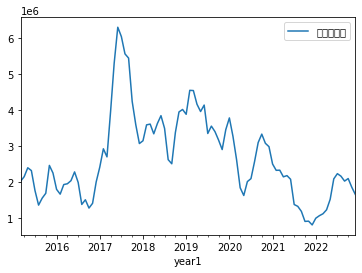

<Figure size 3600x5040 with 0 Axes>

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning:

Glyph 12480 (\N{KATAKANA LETTER DA}) missing from current font.

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning:

Glyph 12452 (\N{KATAKANA LETTER I}) missing from current font.

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning:

Glyph 12450 (\N{KATAKANA LETTER A}) missing from current font.

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning:

Glyph 12473 (\N{KATAKANA LETTER SU}) missing from current font.

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning:

Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning:

Glyph 12288 (\N{IDEOGRAPHIC SPACE}) missing from current font.

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning:

Glyph 21253 (\N{CJ

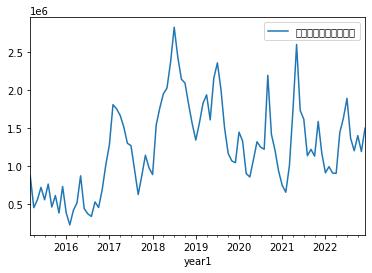

In [ ]:
# basic visual to see how the trend looks like
fig = plt.figure(figsize=(50, 70))
Inv.plot(y = 'サンミラー',x = 'year1')
fig2 = plt.figure(figsize=(50, 70))
Inv.plot(y = 'ダイアラスター　包材',x = 'year1')
print('Inventory Graph')
# plt.savefig('output1.png', dpi=300, bbox_inches='tight')

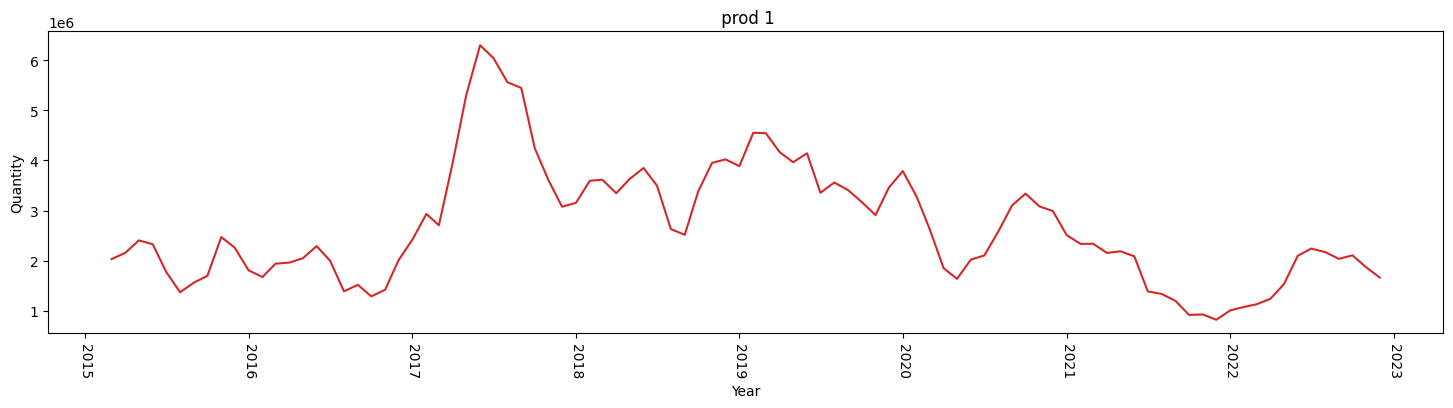

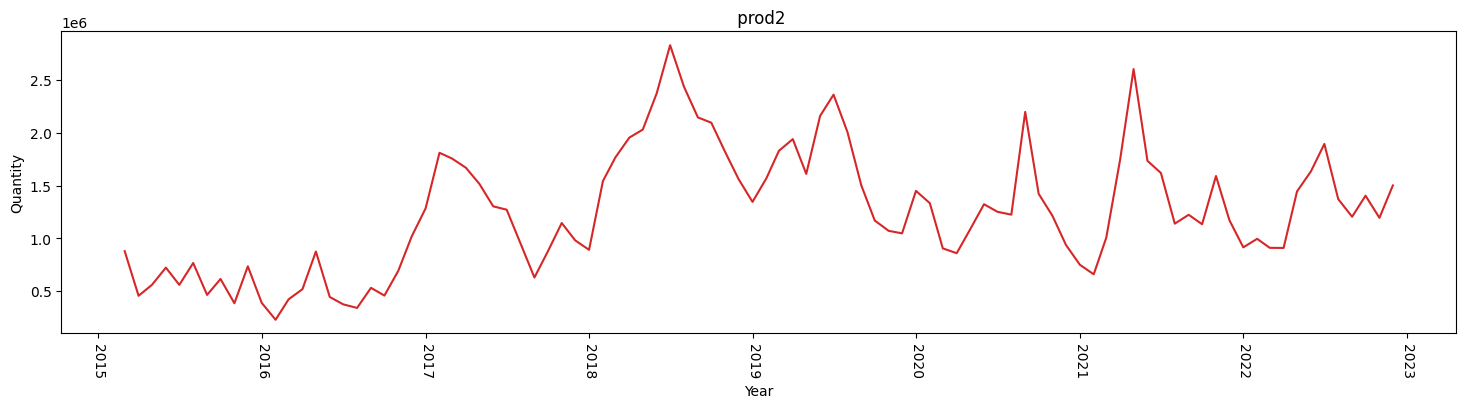

In [ ]:
def plot_inv(Inv,x,y, title=" ", xlabel = 'Year', ylabel = 'Quantity', dpi = 100):
    plt.figure(figsize=(18,4), dpi=dpi)
    plt.plot(x,y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks(rotation=270)
    plt.show()

plot_inv(Inv, x=Inv['year1'], y=Inv['サンミラー'], title=" prod 1")
plot_inv(Inv, x=Inv['year1'], y=Inv['ダイアラスター　包材'], title=" prod2")

# 1e6 = 10^6

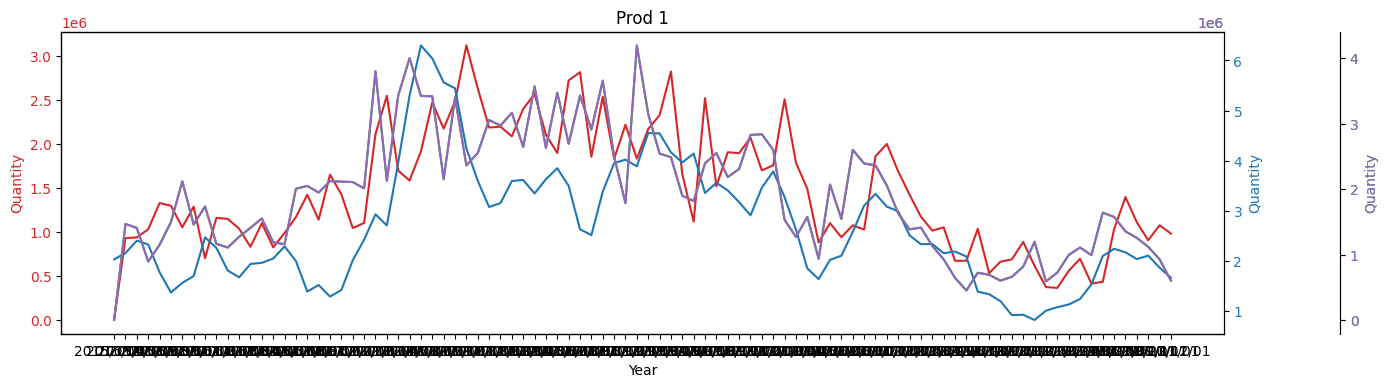

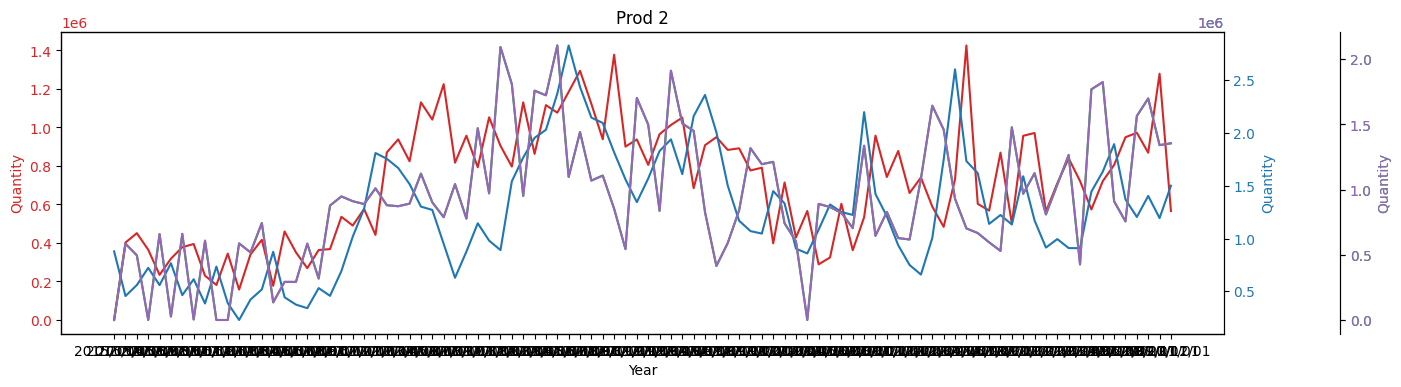

In [ ]:
# Matplot visual

def plot_sales_inventory_order(sales, inventory, orders, acquisition, x, y_sales, y_inventory, y_orders, y_acquisition, title=" ", xlabel='Year', ylabel = 'Quantity', dpi=100):
    fig, ax1 = plt.subplots(figsize=(15,4), dpi=dpi)

    # plot sales data
    ax1.plot(x, y_sales, color='tab:red')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel, color='tab:red')
    ax1.tick_params(axis='y', labelcolor='tab:red')
    ax1.set_title(title)

    # plot inventory data
    ax2 = ax1.twinx()
    ax2.plot(x, y_inventory, color='tab:blue')
    ax2.set_ylabel(ylabel, color='tab:blue')
    ax2.tick_params(axis='y', labelcolor='tab:blue')

    # plot orders data
    ax3 = ax1.twinx()
    ax3.spines.right.set_position(("axes", 1.1))
    ax3.plot(x, y_orders, color='tab:green')
    ax3.set_ylabel(ylabel, color='tab:green')
    ax3.tick_params(axis='y', labelcolor='tab:green')

    # plot orders data
    ax4 = ax1.twinx()
    ax4.spines.right.set_position(("axes", 1.1))
    ax4.plot(x, y_orders, color='tab:purple')
    ax4.set_ylabel(ylabel, color='tab:purple')
    ax4.tick_params(axis='y', labelcolor='tab:purple')

    plt.show()

plot_sales_inventory_order(Sales, Inv, Order, Acq, x=Sales['year1'], y_sales=Sales['サンミラー'], y_inventory=Inv['サンミラー'], y_orders=Order['サンミラー'],y_acquisition=Acq['サンミラー'], title='Prod 1')
plot_sales_inventory_order(Sales, Inv, Order, Acq, x=Sales['year1'], y_sales=Sales['ダイヤラスター包材'], y_inventory=Inv['ダイアラスター　包材'], y_orders=Order['ダイアラスター　包材'],y_acquisition=Acq['ダイアラスター　包材'], title='Prod 2')

In [ ]:
# plotly visual

import plotly.graph_objs as go

def plot_sales_inventory_order(sales, inventory, orders, acquisition, x, y_sales, y_inventory, y_orders, y_acquisition, title=" ", xlabel='Year', ylabel = 'Quantity', dpi=100):
    fig = go.Figure()

    # plot sales data
    fig.add_trace(
        go.Scatter(x=x, y=y_sales, name='Sales', mode='lines', line=dict(color='red'))
    )

    # plot inventory data
    fig.add_trace(
        go.Scatter(x=x, y=y_inventory, name='Inventory', mode='lines', line=dict(color='blue'))
    )

    # plot orders data
    fig.add_trace(
        go.Scatter(x=x, y=y_orders, name='Orders', mode='lines', line=dict(color='green'))
    )

    # plot acquisition data
    fig.add_trace(
        go.Scatter(x=x, y=y_acquisition, name='Acquisition', mode='lines', line=dict(color='purple'))
    )

    # customize layout
    fig.update_layout(
        title=title,
        xaxis_title=xlabel,
        yaxis_title=ylabel
    )

    fig.show()

plot_sales_inventory_order(Sales, Inv, Order, Acq, x=Sales['year1'], y_sales=Sales['サンミラー'], y_inventory=Inv['サンミラー'], y_orders=Order['サンミラー'], y_acquisition=Acq['サンミラー'], title='サンミラー')
plot_sales_inventory_order(Sales, Inv, Order, Acq, x=Sales['year1'], y_sales=Sales['ダイヤラスター包材'], y_inventory=Inv['ダイアラスター　包材'], y_orders=Order['ダイアラスター　包材'], y_acquisition=Acq['ダイアラスター　包材'], title='ダイアラスター　包材')


In [ ]:
# plotly visual

import plotly.graph_objs as go

def plot_sales_inventory_order(sales, inventory, orders, acquisition, x, y_sales, y_inventory, y_orders, y_acquisition, title=" ", xlabel='Year', ylabel = 'Quantity', dpi=100):
    fig = go.Figure()

    # plot sales data
    fig.add_trace(
        go.Scatter(x=x, y=y_sales, name='Sales', mode='lines', line=dict(color='red'))
    )

    # plot inventory data
    fig.add_trace(
        go.Scatter(x=x, y=y_inventory, name='Inventory', mode='lines', line=dict(color='blue'))
    )

    # plot orders data
    fig.add_trace(
        go.Scatter(x=x, y=y_orders, name='Orders', mode='lines', line=dict(color='green'))
    )

    # plot acquisition data
    fig.add_trace(
        go.Scatter(x=x, y=y_acquisition, name='Acquisition', mode='lines', line=dict(color='purple'))
    )

    # customize layout
    fig.update_layout(
        title=title,
        xaxis_title=xlabel,
        yaxis_title=ylabel
    )

    fig.show()

plot_sales_inventory_order(Sales, Inv, Order, Acq, x=Sales['year1'], y_sales=Sales['サンミラー'].cumsum(), y_inventory=Inv['サンミラー'].cumsum(), y_orders=Order['サンミラー'].cumsum(), y_acquisition=Acq['サンミラー'].cumsum(), title='サンミラー')
plot_sales_inventory_order(Sales, Inv, Order, Acq, x=Sales['year1'], y_sales=Sales['ダイヤラスター包材'].cumsum(), y_inventory=Inv['ダイアラスター　包材'].cumsum(), y_orders=Order['ダイアラスター　包材'].cumsum(), y_acquisition=Acq['ダイアラスター　包材'].cumsum(), title='ダイアラスター　包材')


In [ ]:
total_sales = Sales['ダイヤラスター包材'].sum()
total_inventory = Inv['ダイアラスター　包材'].sum()
total_orders = Order['ダイアラスター　包材'].sum()
total_acquisition = Acq['ダイアラスター　包材'].sum()

plot_sales_inventory_order(Sales, Inv, Order, Acq, x=Sales['year1'], y_sales=Sales['ダイヤラスター包材'].cumsum() / total_sales * 100, y_inventory=Inv['ダイアラスター　包材'].cumsum() / total_inventory * 100, y_orders=Order['ダイアラスター　包材'].cumsum() / total_orders * 100, y_acquisition=Acq['ダイアラスター　包材'].cumsum() / total_acquisition * 100, title='ダイアラスター　包材')

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/seasonal.py:338: UserWarning:

Glyph 12469 (\N{KATAKANA LETTER SA}) missing from current font.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/seasonal.py:338: UserWarning:

Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/seasonal.py:338: UserWarning:

Glyph 12511 (\N{KATAKANA LETTER MI}) missing from current font.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/seasonal.py:338: UserWarning:

Glyph 12521 (\N{KATAKANA LETTER RA}) missing from current font.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/seasonal.py:338: UserWarning:

Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.



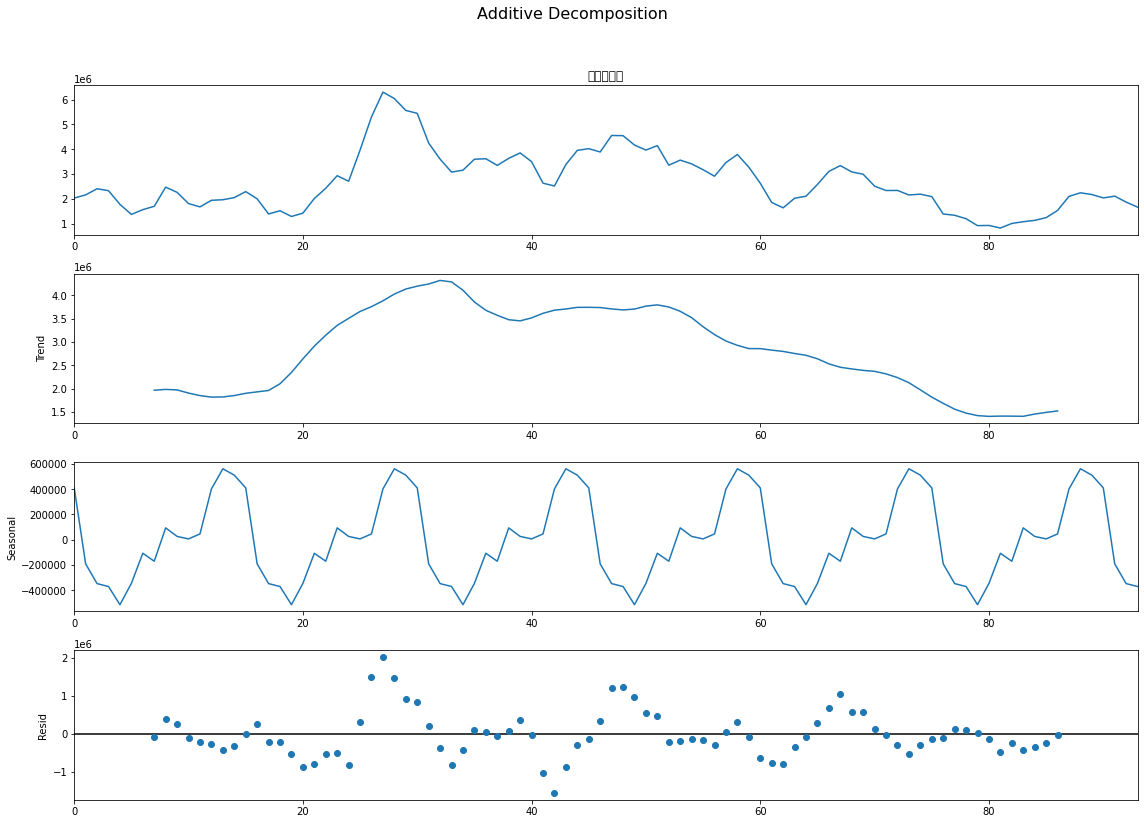

In [ ]:
# decomposition of time series based on additive or multiplicative combination of base level, trend , seasonality and residual term
# Time series may contain - Base level+ Trend+ Seasonality+ error (additive) or Base Level x Trend x Seasonality x Error (multiplicative)

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition
# multiplicative_decomposition = seasonal_decompose(Sales['サンミラー'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(Inv['サンミラー'], model='additive', period=15)
# additive_decomposition2 = seasonal_decompose(Inv['ダイアラスター　包材'], model='additive', period=15)
# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
# multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])

#additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/seasonal.py:338: UserWarning:

Glyph 12480 (\N{KATAKANA LETTER DA}) missing from current font.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/seasonal.py:338: UserWarning:

Glyph 12452 (\N{KATAKANA LETTER I}) missing from current font.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/seasonal.py:338: UserWarning:

Glyph 12450 (\N{KATAKANA LETTER A}) missing from current font.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/seasonal.py:338: UserWarning:

Glyph 12473 (\N{KATAKANA LETTER SU}) missing from current font.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/seasonal.py:338: UserWarning:

Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/seasonal.py:338: UserWarning:

Glyph 12288 (\N{IDEOGRAPHIC SPACE}) missing from current font.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/seasonal.py:338: UserWarning:

Glyph 21253

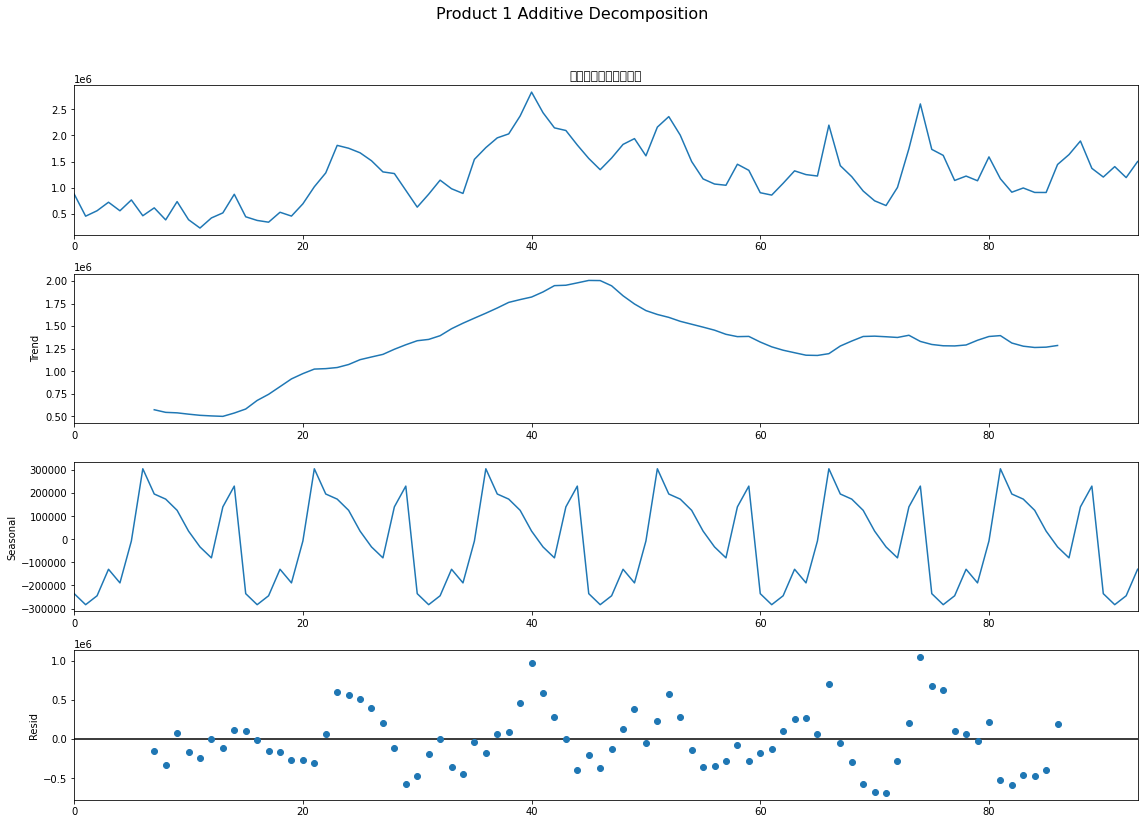

In [ ]:
# decomposition of time series based on additive or multiplicative combination of base level, trend , seasonality and residual term
# Time series may contain - Base level+ Trend+ Seasonality+ error (additive) or Base Level x Trend x Seasonality x Error (multiplicative)

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition
# multiplicative_decomposition = seasonal_decompose(Sales['サンミラー'], model='multiplicative', period=30)

# Additive Decomposition
# additive_decomposition = seasonal_decompose(Inv['サンミラー'], model='additive', period=15)
additive_decomposition = seasonal_decompose(Inv['ダイアラスター　包材'], model='additive', period=15)
# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
# multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Product 1 Additive Decomposition', fontsize=16)

# additive_decomposition2.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [ ]:
# change year to datetime and set index
Inv['year1'] = pd.to_datetime(Inv['year1'])
Inv.set_index('year1', inplace=True)
Inv

サンミラー  ダイアラスター　包材
year1                            
2015-03-01  2030640.0    878340.0
2015-04-01  2157480.0    455200.0
2015-05-01  2404720.0    559480.0
2015-06-01  2326880.0    722280.0
2015-07-01  1774410.0    558820.0
...               ...         ...
2022-08-01  2171240.0   1371040.0
2022-09-01  2035360.0   1204400.0
2022-10-01  2106080.0   1403920.0
2022-11-01  1866320.0   1194040.0
2022-12-01  1662360.0   1500880.0

[94 rows x 2 columns]

In [ ]:
# Stationary test: ADF (Null hypothesis - time series is non -stationary), p>0.05 null hypothesis is rejected (stationary) otherwise we conclude that the data is not stationary
from statsmodels.tsa.stattools import adfuller

# define the time series data
ts = Inv['ダイアラスター　包材']

# perform ADF test
result = adfuller(ts)

# extract test statistics and p-value
test_statistic = result[0]
p_value = result[1]

# print test statistics and p-value
print(f'Test statistic: {test_statistic}')
print(f'p-value: {p_value}')
# p value is less than 0.05 so null is rejected i.ei the series is supposedly stationary

Test statistic: -3.2014662312166906
p-value: 0.01989996471561568


In [ ]:
# Stationary test: KPSS (Null hypothesis is stationary)
from statsmodels.tsa.stattools import kpss

# Conduct the KPSS test
kpss_test = kpss(ts)

# Print the test statistics and p-values
print('KPSS Test Statistic:', kpss_test[0])
print('p-value:', kpss_test[1])
print('Lags Used:', kpss_test[2])
print('Critical Values:', kpss_test[3])
# in this case, p value is less than 0.05 so it must not be stationary (appearances of noises)

KPSS Test Statistic: 0.504763658778425
p-value: 0.04059377054539978
Lags Used: 5
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


p value > 0.05 so we cannot reject null hypothesis, the data is not stationary.
NOTE: Based on the test statistic and p-value you provided, the ADF test suggests that the time series may be non-stationary, but the evidence is not strong enough to reject the null hypothesis at the 5% significance level.

The test statistic of -2.6906651168446425 is a measure of how many standard deviations the sample mean is away from the null hypothesis. A more negative test statistic would indicate stronger evidence against the null hypothesis.

The p-value of 0.07566758821706894 is the probability of observing a test statistic as extreme as -2.6906651168446425 or more extreme, assuming the null hypothesis is true. This means that there is about a 7.6% chance of obtaining a test statistic as extreme as the one observed if the time series were actually stationary.

Since the p-value is greater than 0.05, we fail to reject the null hypothesis and conclude that there is insufficient evidence to suggest that the time series is stationary. However, it's possible that the time series exhibits some degree of trend or seasonality, and further analysis may be necessary to better understand its behavior.  (for prod 2)

Prod 1 is stationary

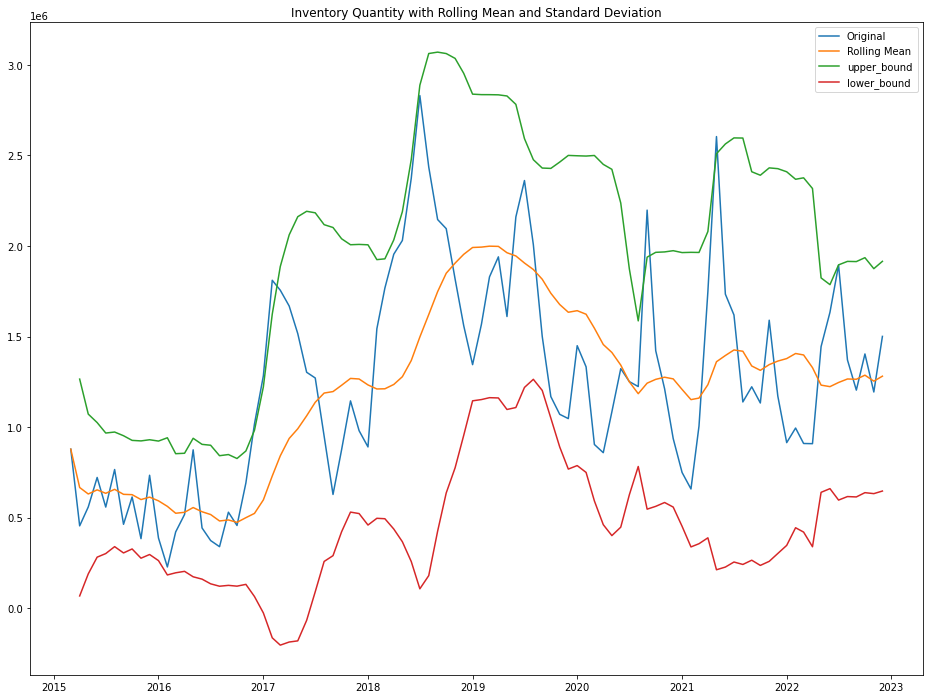

In [ ]:
# rolling mean (moving average) and std dev.

# Calculate the rolling mean and standard deviation with a window of 30 days
rolling_mean = Inv['ダイアラスター　包材'].rolling(window=12,min_periods=1).mean()
rolling_std = Inv['ダイアラスター　包材'].rolling(window=12,min_periods=1).std()

upper_bound = rolling_mean + 2 * rolling_std # 2 as (for 95% confidence interval lies within 2 std dev.)
lower_bound = rolling_mean - 2 * rolling_std

# Plot the original data and the rolling statistics
plt.plot(Inv.index, Inv['ダイアラスター　包材'], label='Original')
plt.plot(rolling_mean.index, rolling_mean, label='Rolling Mean ')
plt.plot(rolling_std.index, upper_bound, label='upper_bound')
plt.plot(rolling_std.index, lower_bound, label='lower_bound')
plt.legend(loc='best')
plt.title('Inventory Quantity with Rolling Mean and Standard Deviation')
plt.show()


In [ ]:
Inv_P1 = Inv[['ダイアラスター　包材']]
print(Inv_P1,rolling_mean, rolling_std, upper_bound, lower_bound)

            ダイアラスター　包材
year1                 
2015-03-01    878340.0
2015-04-01    455200.0
2015-05-01    559480.0
2015-06-01    722280.0
2015-07-01    558820.0
...                ...
2022-08-01   1371040.0
2022-09-01   1204400.0
2022-10-01   1403920.0
2022-11-01   1194040.0
2022-12-01   1500880.0

[94 rows x 1 columns] year1
2015-03-01    8.783400e+05
2015-04-01    6.667700e+05
2015-05-01    6.310067e+05
2015-06-01    6.538250e+05
2015-07-01    6.348240e+05
                  ...     
2022-08-01    1.265824e+06
2022-09-01    1.264290e+06
2022-10-01    1.286840e+06
2022-11-01    1.253830e+06
2022-12-01    1.281280e+06
Name: ダイアラスター　包材, Length: 94, dtype: float64 year1
2015-03-01              NaN
2015-04-01    299205.163391
2015-05-01    220451.611319
2015-06-01    185693.243370
2015-07-01    166333.025825
                  ...      
2022-08-01    324496.605806
2022-09-01    324761.750127
2022-10-01    324235.226812
2022-11-01    310417.093638
2022-12-01    316968.079937
Name: ダイアラスター　包材

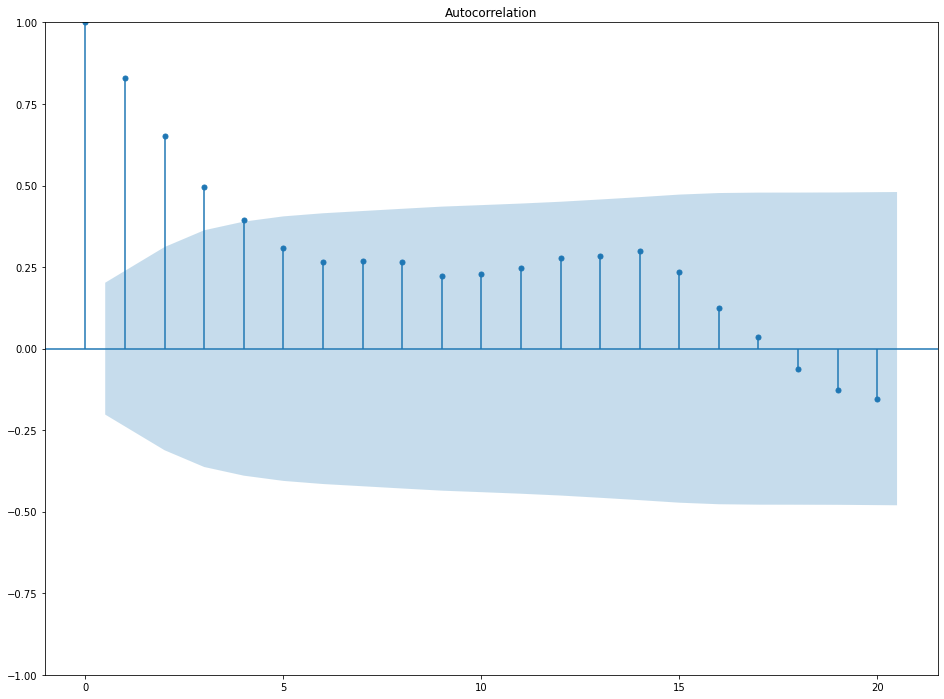

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(Inv['ダイアラスター　包材'])
plt.show()

In [ ]:
# Check error metrics
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
# another method for moving average

def moving_average(series, n):
    """
        Calculate average of last n observations
    """
    return np.average(series[-n:])

moving_average(Inv_P1, 12)

1281280.3666666667

In [ ]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")

        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)

    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

In [ ]:
P_anomaly = Inv_P1.copy()
P_anomaly.iloc[-20] = P_anomaly.iloc[-20] * 0.2

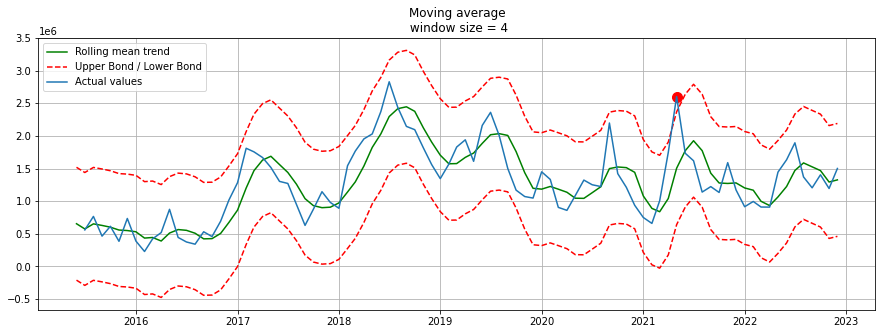

In [ ]:
plotMovingAverage(Inv_P1, 4, plot_intervals=True, plot_anomalies=True) # every 4 months (window size)

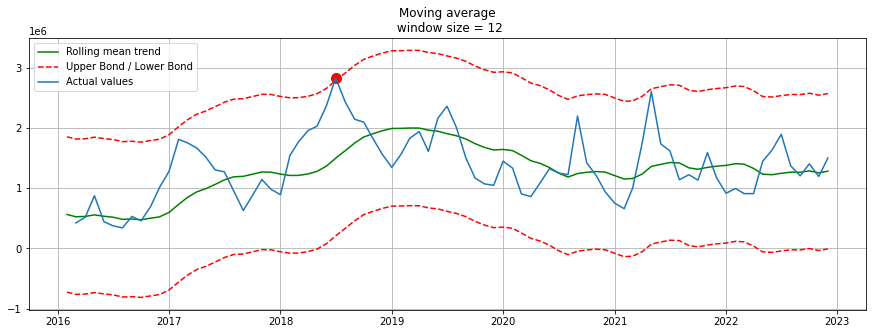

In [ ]:
plotMovingAverage(Inv_P1, 12, plot_intervals=True, plot_anomalies=True) # every 12 months

In [ ]:
# Exponential smoothing

def exponential_smoothing(series, alpha):
    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    """
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [ ]:
def plotExponentialSmoothing(series, alphas):
    """
        Plots exponential smoothing with different alphas

        series - dataset with timestamps
        alphas - list of floats, smoothing parameters

    """
    with plt.style.context('seaborn-white'):
        plt.figure(figsize=(15, 7))
        for alpha in alphas:
            plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
        plt.plot(series.values, "c", label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Exponential Smoothing")
        plt.grid(True);

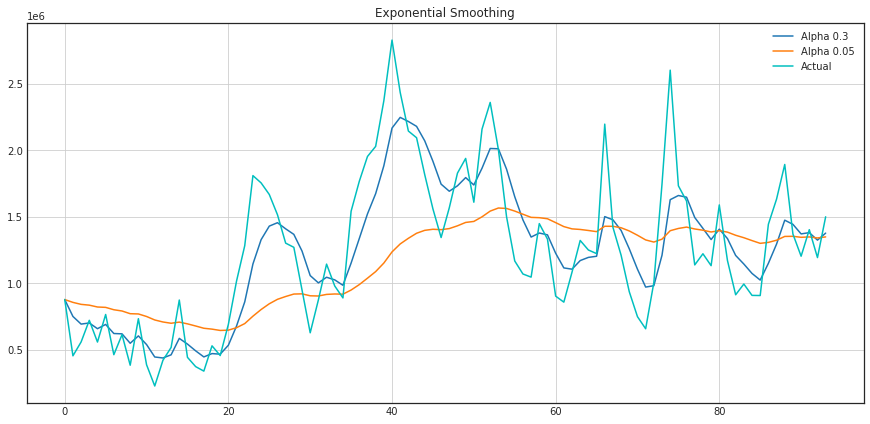

In [ ]:
plotExponentialSmoothing(Inv_P1['ダイアラスター\u3000包材'], [0.3, 0.05]) #指数平滑化 (alpha is better between 0.1 to 0.3)

Autocorrelation (ACF) and partial autocorrelation (PACF) plots can help identify the presence of trend and seasonality in a time series. ACF plots show the correlation between each observation and its lagged values, while PACF plots show the correlation between each observation and its lagged values after accounting for the influence of earlier lags.



In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

def perform_additive_decomposition(Inv, var1, var2, period):
    '''
    Perform additive decomposition on two variables of a given data set.

    Parameters:
    data (pandas DataFrame): The data set containing the variables to decompose.
    var1 (str): The name of the first variable to decompose.
    var2 (str): The name of the second variable to decompose.
    period (int): The length of the seasonal period.

    Returns:
    tuple: A tuple containing the additive decomposition plots for each variable.
    '''
    # Perform additive decomposition on variable 1
    additive_decomposition1 = seasonal_decompose(data[var1], model='additive', period=period)

    # Perform additive decomposition on variable 2
    additive_decomposition2 = seasonal_decompose(data[var2], model='additive', period=period)

    # Plot the decompositions
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
    additive_decomposition1.observed.plot(ax=axes[0, 0], legend=False)
    axes[0, 0].set_ylabel(var1)
    additive_decomposition1.trend.plot(ax=axes[1, 0], legend=False)
    axes[1, 0].set_ylabel('Trend')
    additive_decomposition1.seasonal.plot(ax=axes[0, 1], legend=False)
    axes[0, 1].set_ylabel('Seasonal')
    additive_decomposition1.resid.plot(ax=axes[1, 1], legend=False)
    axes[1, 1].set_ylabel('Residual')
    fig.suptitle('Additive Decomposition', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
    additive_decomposition2.observed.plot(ax=axes[0, 0], legend=False)
    axes[0, 0].set_ylabel(var2)
    additive_decomposition2.trend.plot(ax=axes[1, 0], legend=False)
    axes[1, 0].set_ylabel('Trend')
    additive_decomposition2.seasonal.plot(ax=axes[0, 1], legend=False)
    axes[0, 1].set_ylabel('Seasonal')
    additive_decomposition2.resid.plot(ax=axes[1, 1], legend=False)
    axes[1, 1].set_ylabel('Residual')
    fig.suptitle('Additive Decomposition', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    return additive_decomposition1, additive_decomposition2


In [ ]:
df

Client name Mid_class_name subdivision_name  Sales quantity  \
0              旭洋　株式会社　福岡支店     ダイアラスター　包材       ダイアラスター　ＳＴ            2000   
1       凸版印刷　株式会社　購買部　福崎チーム     ダイアラスター　包材       ダイアラスター　ＨＥ            2000   
2       凸版印刷　株式会社　購買部　福崎チーム     ダイアラスター　包材       ダイアラスター　ＨＥ            4000   
3       凸版印刷　株式会社　購買部　福崎チーム     ダイアラスター　包材       ダイアラスター　ＨＥ           16000   
4       凸版印刷　株式会社　購買部　福崎チーム     ダイアラスター　包材       ダイアラスター　ＨＥ            4000   
...                     ...            ...              ...             ...   
101598           大日本印刷　株式会社          サンミラー      ＣＰ－ＦＧ　Ｄ　＃２５           20000   
101599     旭洋　株式会社　化成品営業第二部          サンミラー      ＣＰ－ＦＧ　Ｄ　＃４０            4000   
101600     旭洋　株式会社　化成品営業第二部          サンミラー      ＣＰ－ＦＧ　Ｄ　＃４０            2000   
101601     旭洋　株式会社　化成品営業第二部          サンミラー      ＣＰ－ＦＧ　Ｄ　＃４０            4000   
101602   フィルネクスト　株式会社　つくば工場          サンミラー      ＣＰ－ＦＧ　Ｄ　＃２５            4000   

         Sales  Sales per qty  
0        15340          7.670  
1        17240          8.620  
2        33720          8.430  
3        94080          5.880  
4        19600          4.900  
...        ...            ...  
101598  293560         14.678  
101599  101160         25.290  
101600   29920         14.960  
101601   82560         20.640  
101602   56668         14.167  

[101603 rows x 6 columns]

Box plot


In [ ]:
df = sales[['Client name', 'Mid_class_name','subdivision_name','Sales quantity','Sales','Sales per qty']]

In [ ]:
# plotly visual
import plotly.express as px

# select the required columns
df = sales[['Mid_class_name', 'Sales', 'Sales per qty']]

# create a separate box plot for each unique value in 'Mid_class_name'
for mid_class in df['Mid_class_name'].unique():
    fig = px.box(df[df['Mid_class_name'] == mid_class], y=['Sales', 'Sales per qty'], points="all",
                 title=f'Sales and Sales per qty for {mid_class}')
    fig.show()


In [ ]:
# quartile values
import numpy as np

# select the required columns
df = sales[['Mid_class_name', 'Sales quantity', 'Sales', 'Sales per qty']]

# create a separate summary table for each unique value in 'Mid_class_name'
for mid_class in df['Mid_class_name'].unique():
    mid_class_df = df[df['Mid_class_name'] == mid_class]
    q1 = np.percentile(mid_class_df['Sales per qty'], 25)
    q2 = np.percentile(mid_class_df['Sales per qty'], 50)
    q3 = np.percentile(mid_class_df['Sales per qty'], 75)
    iqr = q3 - q1
    minimum = mid_class_df['Sales per qty'].min()
    maximum = mid_class_df['Sales per qty'].max()
    std = mid_class_df['Sales per qty'].std()
    print(f"Summary for {mid_class}:")
    print(f"Q1: {q1}")
    print(f"Q2: {q2}")
    print(f"Q3: {q3}")
    print(f"IQR: {iqr}")
    print(f"Min: {minimum}")
    print(f"Max: {maximum}")
    print(f"Std: {std}")


Summary for ダイアラスター　包材:
Q1: 7.298
Q2: 8.722
Q3: 10.396
IQR: 3.0980000000000008
Min: 0.0
Max: 704920.0
Std: 4436.67745229183
Summary for サンミラー:
Q1: 9.996
Q2: 11.883
Q3: 14.19
IQR: 4.193999999999999
Min: 0.0
Max: 160902.0
Std: 999.7300842342095
Summary for ファインバリヤー:
Q1: 10.25
Q2: 12.25
Q3: 15.932
IQR: 5.682
Min: 0.0
Max: 17600.0
Std: 215.66850361729772
Summary for 透明蒸着:
Q1: 10.614
Q2: 12.81
Q3: 15.708
IQR: 5.093999999999999
Min: 0.267
Max: 1882710.0
Std: 66549.47109753257


In [ ]:
import plotly.graph_objs as go

# group data by subdivision name
subdivisions = sales.groupby('subdivision_name')

# create a table for the IQR and range values for each subdivision
table_data = []
for name, group in subdivisions:
    sales_qty_q1, sales_qty_q2, sales_qty_q3 = group['Sales quantity'].quantile([0.25, 0.5, 0.75])
    sales_qty_iqr = sales_qty_q3 - sales_qty_q1
    sales_qty_range = (group['Sales quantity'].min(), group['Sales quantity'].max())

    sales_q1, sales_q2, sales_q3 = group['Sales'].quantile([0.25, 0.5, 0.75])
    sales_iqr = sales_q3 - sales_q1
    sales_range = (group['Sales'].min(), group['Sales'].max())

    sales_per_qty_q1, sales_per_qty_q2, sales_per_qty_q3 = group['Sales per qty'].quantile([0.25, 0.5, 0.75])
    sales_per_qty_iqr = sales_per_qty_q3 - sales_per_qty_q1
    sales_per_qty_range = (group['Sales per qty'].min(), group['Sales per qty'].max())

    table_data.append([name, sales_qty_q1, sales_qty_q2, sales_qty_q3, sales_qty_iqr, sales_qty_range[0], sales_qty_range[1],
                       sales_q1, sales_q2, sales_q3, sales_iqr, sales_range[0], sales_range[1],
                       sales_per_qty_q1, sales_per_qty_q2, sales_per_qty_q3, sales_per_qty_iqr, sales_per_qty_range[0], sales_per_qty_range[1]])

# create table trace
table_trace = go.Table(
    header=dict(values=["subdivision_name", "Sales Qty Q1", "Sales Qty Q2", "Sales Qty Q3", "Sales Qty IQR", "Sales Qty Min", "Sales Qty Max",
                         "Sales Q1", "Sales Q2", "Sales Q3", "Sales IQR", "Sales Min", "Sales Max",
                         "Sales per Qty Q1", "Sales per Qty Q2", "Sales per Qty Q3", "Sales per Qty IQR", "Sales per Qty Min", "Sales per Qty Max"]),
    cells=dict(values=[list(x) for x in zip(*table_data)])
)

# create figure with table trace
fig = go.Figure(data=[table_trace])
fig.show()


In [ ]:
import pandas as pd
import plotly.graph_objs as go

# group data by subdivision name
subdivisions = sales.groupby('Mid_class_name')

# create a table for the IQR and range values for each subdivision
table_data = []
for name, group in subdivisions:
    sales_qty_q1, sales_qty_q2, sales_qty_q3 = group['Sales quantity'].quantile([0.25, 0.5, 0.75])
    sales_qty_iqr = sales_qty_q3 - sales_qty_q1
    sales_qty_range = (group['Sales quantity'].min(), group['Sales quantity'].max())

    sales_q1, sales_q2, sales_q3 = group['Sales'].quantile([0.25, 0.5, 0.75])
    sales_iqr = sales_q3 - sales_q1
    sales_range = (group['Sales'].min(), group['Sales'].max())

    sales_per_qty_q1, sales_per_qty_q2, sales_per_qty_q3 = group['Sales per qty'].quantile([0.25, 0.5, 0.75])
    sales_per_qty_iqr = sales_per_qty_q3 - sales_per_qty_q1
    sales_per_qty_range = (group['Sales per qty'].min(), group['Sales per qty'].max())

    table_data.append([name, sales_qty_q1, sales_qty_q2, sales_qty_q3, sales_qty_iqr, sales_qty_range[0], sales_qty_range[1],
                       sales_q1, sales_q2, sales_q3, sales_iqr, sales_range[0], sales_range[1],
                       sales_per_qty_q1, sales_per_qty_q2, sales_per_qty_q3, sales_per_qty_iqr, sales_per_qty_range[0], sales_per_qty_range[1]])

# create table trace
table_trace = go.Table(
    header=dict(values=["Mid_class_name", "Sales Qty Q1", "Sales Qty Q2", "Sales Qty Q3", "Sales Qty IQR", "Sales Qty Min", "Sales Qty Max",
                         "Sales Q1", "Sales Q2", "Sales Q3", "Sales IQR", "Sales Min", "Sales Max",
                         "Sales per Qty Q1", "Sales per Qty Q2", "Sales per Qty Q3", "Sales per Qty IQR", "Sales per Qty Min", "Sales per Qty Max"]),
    cells=dict(values=[list(x) for x in zip(*table_data)])
)

# create figure with table trace
fig = go.Figure(data=[table_trace])

# export table data to Excel file
df = pd.DataFrame(table_data, columns=["Mid_class_name", "Sales Qty Q1", "Sales Qty Q2", "Sales Qty Q3", "Sales Qty IQR", "Sales Qty Min", "Sales Qty Max",
                                       "Sales Q1", "Sales Q2", "Sales Q3", "Sales IQR", "Sales Min", "Sales Max",
                                       "Sales per Qty Q1", "Sales per Qty Q2", "Sales per Qty Q3", "Sales per Qty IQR", "Sales per Qty Min", "Sales per Qty Max"])
df.to_excel("table_data2.xlsx", index=False)

# show figure
fig.show()
